# **EDA2: How close are we to the Net Zero?**

***Global Power Plant Database (World Resources Institute)***

The world needs to reduce fossil fuel usage and increase renewable energy. However, growing energy demand makes it difficult to reach the net-zero goal before 2030.

The Global Power Plant Database is used to analyze the global energy transition. This analysis aims to answer the questions below and help readers understand the current stage of global energy, supporting informed decision-making.

- Why just renewable energy is not enough?
- Which type of power plant produce is the most use?
- Which countries rely most on renewables?
- What’s the distribution of power plant sizes?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

# Set styles
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


## Extracting Data from the World Resources Institute (API and ZIP URL)
import requests

response = requests.request(
    "GET",
    "https://datasets.wri.org/api/3/action/resource_show?id=66bcdacc-3d0e-46ad-9271-a5a76b1853d2",
    
)

data = response.json()
data.keys()
data['result']


{'cache_last_updated': None,
 'cache_url': None,
 'created': '2024-10-16T13:22:17.356484',
 'datastore_active': False,
 'description': 'Version 1.3.0 (June 2021)',
 'format': 'ZIP',
 'hash': '',
 'id': '66bcdacc-3d0e-46ad-9271-a5a76b1853d2',
 'last_modified': '2024-10-16T13:22:17.257329',
 'metadata_modified': '2024-10-16T13:22:17.346427',
 'mimetype': 'application/zip',
 'mimetype_inner': None,
 'name': 'Version 1.3.0',
 'package_id': '53623dfd-3df6-4f15-a091-67457cdb571f',
 'position': 3,
 'resource_type': None,
 'size': 4178889,
 'state': 'active',
 'title': 'Version 1.3.0',
 'url': 'https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip',
 'url_type': 'upload'}

In [17]:
import zipfile
import io

zip_url = "https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip"


# Download the ZIP
r = requests.get(zip_url)
z = zipfile.ZipFile(io.BytesIO(r.content))

# List files in the ZIP
z.namelist()

# Load the CSV file into a DataFrame
csv_file = "global_power_plant_database.csv"
df = pd.read_csv(z.open(csv_file))
df.head()

/var/folders/m5/pl7f3qbs4wz97g9ld9_84ysw0000gn/T/ipykernel_30858/1145850114.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(z.open(csv_file))


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


## **Data Cleaning and Preparation**

In [18]:
# df.shape # (34936, 36)
df.columns # 36 columns, many different data types
# df.describe() # summary statistics for numerical columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [19]:
# Only extract relevant columns
df = df[['country_long', 'name', 'capacity_mw',
        'primary_fuel','latitude', 'longitude',
        'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
        'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
        'estimated_generation_gwh_2017']].copy()

df.head()


,country_long,name,capacity_mw,primary_fuel,latitude,longitude,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.322,65.1190,123.77,162.90,97.39,137.76,119.50
1,Afghanistan,Kandahar DOG,10.0,Solar,31.670,65.7950,18.43,17.48,18.25,17.70,18.29
2,Afghanistan,Kandahar JOL,10.0,Solar,31.623,65.7920,18.64,17.58,19.10,17.62,18.72
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.556,69.4787,225.06,203.55,146.90,230.18,174.91
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.641,69.7170,406.16,357.22,270.99,395.38,350.80


In [20]:
df.dtypes

country_long                      object
name                              object
capacity_mw                      float64
primary_fuel                      object
latitude                         float64
longitude                        float64
estimated_generation_gwh_2013    float64
estimated_generation_gwh_2014    float64
estimated_generation_gwh_2015    float64
estimated_generation_gwh_2016    float64
estimated_generation_gwh_2017    float64
dtype: object

## **Power Plant Map**

In [21]:
# import folium
# # Center map at global level
# m = folium.Map(location=[20,0], zoom_start=2)

# # Add power plants as circles
# for _, row in df.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=3,
#         popup=f"{row['name']} ({row['primary_fuel']}) - {row['capacity_mw']} MW",
#         color="blue" if row['primary_fuel'] in ["Solar", "Wind", "Hydro"] else "red",
#         fill=True,
#         fill_opacity=0.7
#     ).add_to(m)

# m.save("power_plants_map.html")

## **Energy Transition** 
The world needs to reduce fossil fuel usage and increase renewable energy. The first step is to understand the current status: the number of power plants that are renewable versus fossil fuels.

### Number of Power Plants 

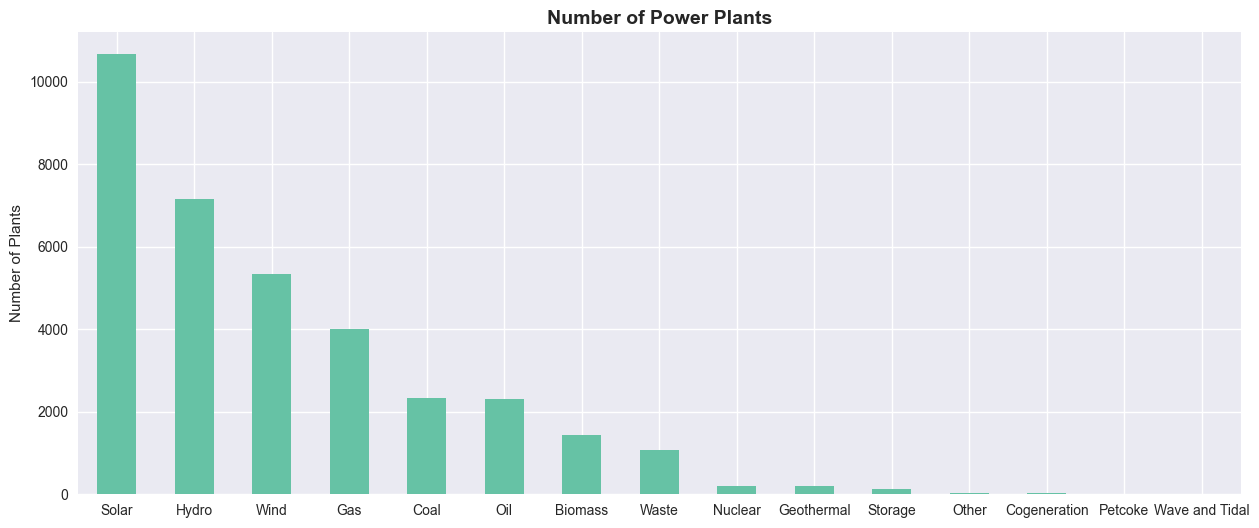

In [22]:
df['primary_fuel'].unique()

fuel_counts = df["primary_fuel"].value_counts()

plt.figure(figsize=(15,6))
fuel_counts.plot(kind="bar")
plt.title("Number of Power Plants", fontsize=14, fontweight='bold')
plt.xlabel(None)
plt.ylabel("Number of Plants")
plt.xticks(rotation=0)
plt.show()

### **What is the global share of renewables vs fossil fuels?**

**Note**: Nuclear and Storage are considered neither renewable nor fossil fuels.

`shape[0]` is used to get the number of rows (i.e., the count of power plants) that match a condition.

`value_counts() `counts the occurrences of each unique value in a column.

In [23]:
df['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

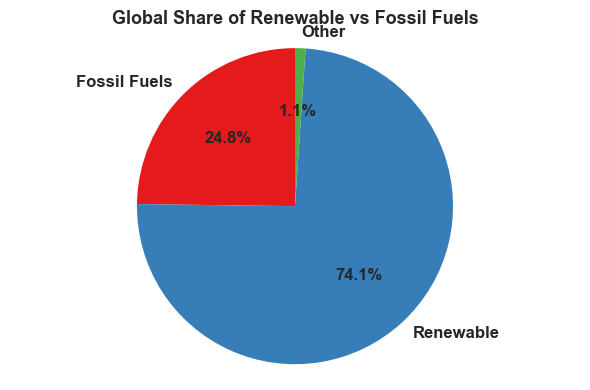

           Type  Count
0  Fossil Fuels   8660
1     Renewable  25903


In [24]:
# Select fossil fuels and renewable
fossil_fuels = ['Coal', 'Gas', 'Oil', 'Petcoke']
renewable = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']


fossil_count= df[df['primary_fuel'].isin(fossil_fuels)].shape[0]
renewable_count = df[df['primary_fuel'].isin(renewable)].shape[0]
other_count = df.shape[0] - (fossil_count + renewable_count)

# Plot as pie chart

# Combine counts for pie chart
labels = ['Fossil Fuels', 'Renewable', 'Other']
sizes = [fossil_count, renewable_count, other_count]
colors = sns.color_palette("Set1", len(sizes)) # Colour from seaborn(plasma, magma, or cividis)

plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Global Share of Renewable vs Fossil Fuels', fontsize=13, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


summary = pd.DataFrame({'Type': ['Fossil Fuels', 'Renewable'],'Count': [fossil_count, renewable_count]})
print(summary)


### **What about the percentage of energy generated?**

In [25]:
#Calculate total estimated energy generated in 2017
total_energy = df['estimated_generation_gwh_2017'].sum()

# Calculate energy generated by fossil fuels
fossil_energy = df[df['primary_fuel'].isin(fossil_fuels)]['estimated_generation_gwh_2017'].sum()

# Calculate energy generated by renewables
renewable_energy = df[df['primary_fuel'].isin(renewables)]['estimated_generation_gwh_2017'].sum()


# Calculate percentages
fossil_pct = fossil_energy / total_energy * 100
renewable_pct = renewable_energy / total_energy * 100
other_pct = 100 - (fossil_pct + renewable_pct) 

print(f"Fossil Fuels: {fossil_pct:.1f}%")
print(f"Renewable: {renewable_pct:.1f}%")
print(f"Others: {other_pct:.1f}%")

summary = pd.DataFrame({
    "Category": ["Fossil Fuels", "Renewable"],
    "Energy Generated (GWh)": [fossil_energy, renewable_energy],
    "Percentage of Total (%)": [fossil_pct, renewable_pct]
})


summary.style.hide(axis="index").format({
    "Energy Generated (GWh)": "{:,.0f}",
    "Percentage of Total (%)": "{:.1f}%"
}).set_caption("Global Energy Generation in 2017 (Estimated)").set_table_styles([
        {
            "selector": "caption",
            "props": [("font-size", "14px"), ("font-weight", "bold"),("color", "black"),
            ("text-align", "center")]
        }
    ])


Fossil Fuels: 68.1%
Renewable: 19.6%
Others: 12.3%


Category,Energy Generated (GWh),Percentage of Total (%)
Fossil Fuels,"16,176,169",68.1%
Renewable,"4,646,392",19.6%


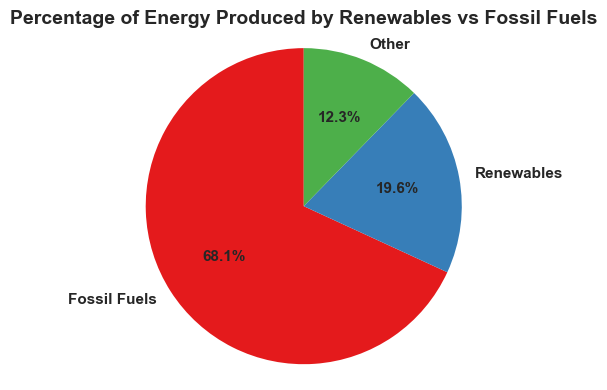

In [28]:
# Combine counts for pie chart
labels = ['Fossil Fuels', 'Renewables', 'Other']
sizes = [fossil_pct, renewable_pct, other_pct]
# Use the already defined 'colors' variable

plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Percentage of Energy Produced by Renewables vs Fossil Fuels', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

### **Installed Capacity**

In [41]:
#Calculate total estimated energy generated in 2017
total_energy = df['capacity_mw'].sum()

# Calculate energy generated by fossil fuels
fossil_energy = df[df['primary_fuel'].isin(fossil_fuels)]['capacity_mw'].sum()

# Calculate energy generated by renewables
renewable_energy = df[df['primary_fuel'].isin(renewables)]['capacity_mw'].sum()


# Calculate percentages
fossil_pct = fossil_energy / total_energy * 100
renewable_pct = renewable_energy / total_energy * 100
other_pct = 100 - (fossil_pct + renewable_pct) 

print(f"Fossil Fuels: {fossil_pct:.1f}%")
print(f"Renewable: {renewable_pct:.1f}%")
print(f"Others: {other_pct:.1f}%")

summary = pd.DataFrame({
    "Category": ["Fossil Fuels", "Renewable"],
    "Installed Capacity (mW)": [fossil_energy, renewable_energy],
    "Percentage of Total (%)": [fossil_pct, renewable_pct]
})


summary.style.hide(axis="index").format({
    "Installed Capacity (mW)": "{:,.0f}",
    "Percentage of Total (%)": "{:.1f}%"
}).set_caption("Global Energy Generation in 2017 (Estimated)").set_table_styles([
        {
            "selector": "caption",
            "props": [("font-size", "14px"), ("font-weight", "bold"),("color", "black"),
            ("text-align", "center")]
        }
    ])


Fossil Fuels: 65.2%
Renewable: 27.5%
Others: 7.3%


Category,Installed Capacity (mW),Percentage of Total (%)
Fossil Fuels,"3,720,470",65.2%
Renewable,"1,570,844",27.5%


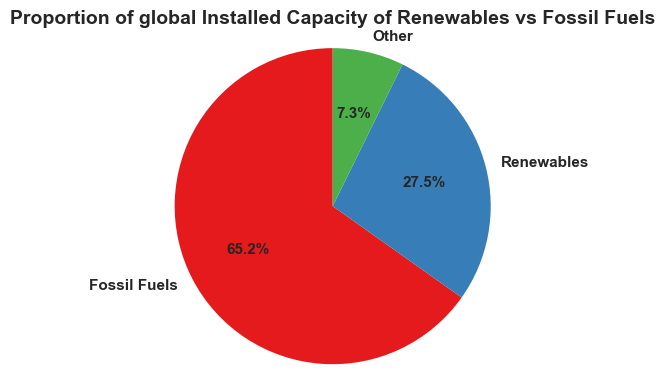

In [43]:
# Combine counts for pie chart
labels = ['Fossil Fuels', 'Renewables', 'Other']
sizes = [fossil_pct, renewable_pct, other_pct]
# Use the already defined 'colors' variable

plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Proportion of global Installed Capacity of Renewables vs Fossil Fuels', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

## **Which type of power plant produce the most energy?**  

- What type of power plant does the world rely on most?
- Is it easy to be converted to other types
- Why is it used the most?
- Where does most renewable energy come from?

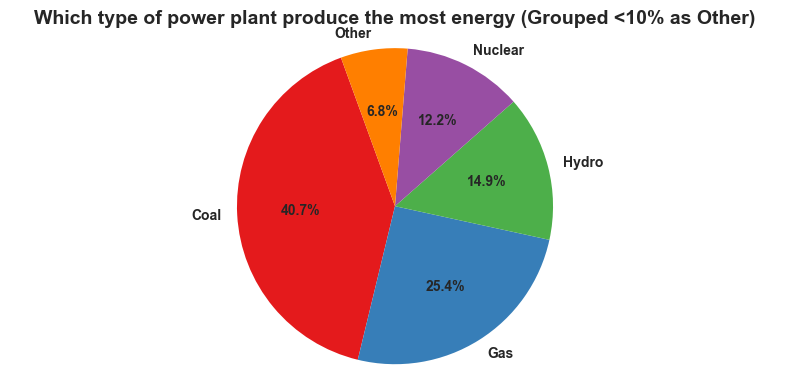

In [ ]:
# Select the most recent year available
year = "estimated_generation_gwh_2017"

# Select fossil fuels and renewable
fossil_fuels = ['Coal', 'Gas', 'Oil', 'Petcoke']
renewable = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']


# Group by primary fuel and sum the energy generated
Plant_energy_estimate = df.groupby("primary_fuel")[year].sum().sort_values(ascending=False) 


# Calculate percentage share for each fuel type
total_energy = Plant_energy_estimate.sum()
percentages = Plant_energy_estimate / total_energy * 100

# Group those less than 10% into 'Other'
main_types = percentages[percentages >= 10]
other_sum = percentages[percentages < 10].sum()


# Prepare final data for pie chart
final_plot = main_types.copy()
if other_sum: 
    final_plot['Other'] = other_sum

final_plot 

colors = sns.color_palette("Set1", len(final_plot))

plt.figure(figsize=(8,4))
plt.pie(
    final_plot,
    labels=final_plot.index,
    autopct='%1.1f%%',
    startangle=110,
    colors=colors,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)
plt.title("Which type of power plant produce the most energy ", fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# **What countries generate the most energy?** 

This will be classified based on installed capacity (the maximum amount of electricity that a power generation facility is designed to produce under ideal conditions).

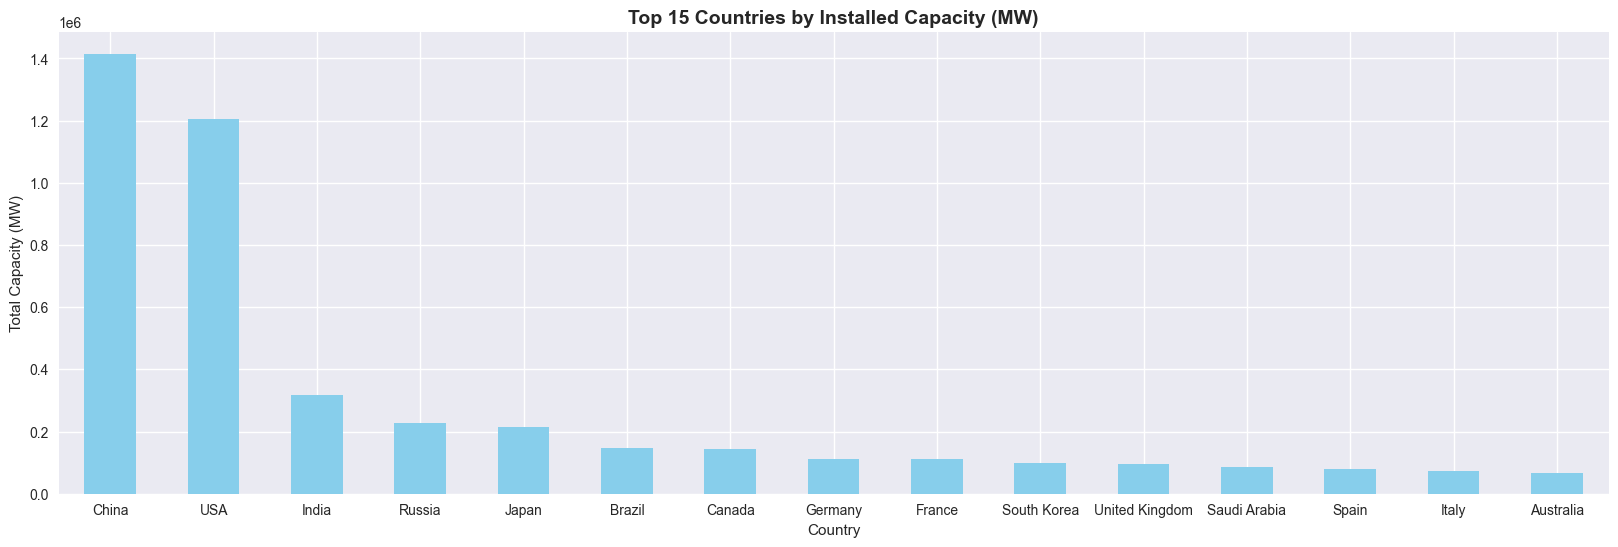

In [36]:
country_capacity = df.groupby("country_long")["capacity_mw"].sum().sort_values(ascending=False).head(15)

df["country_long"] = df["country_long"].replace('United States of America', 'USA')

plt.figure(figsize=(20,6))
country_capacity.plot(kind="bar", color='skyblue')
plt.title("Top 15 Countries by Installed Capacity (MW)", fontsize=14, fontweight='bold')
plt.ylabel("Total Capacity (MW)")
plt.xlabel("Country")
plt.xticks(rotation=0)
plt.show()


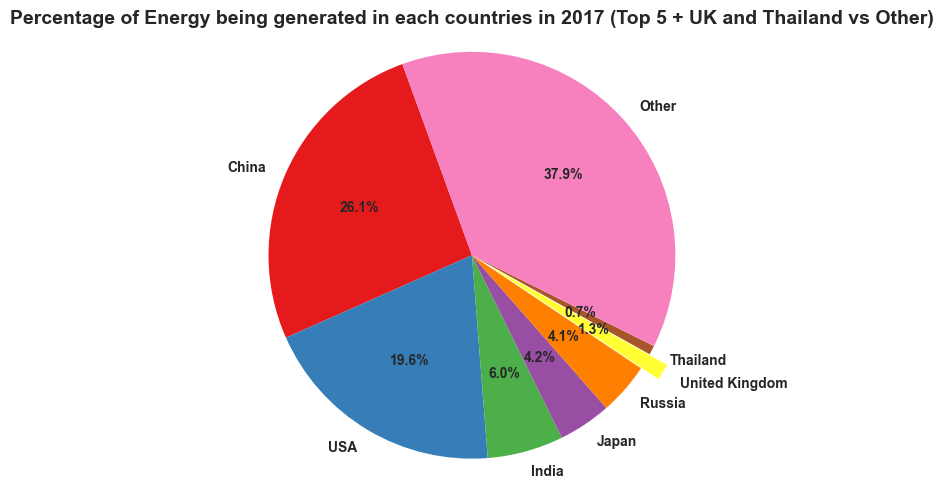

In [ ]:
# Replace 'United States of America' with 'USA' before grouping
# df["country_long"] = df["country_long"].replace('United States of America', 'USA')

# Select the most recent year available
year = "estimated_generation_gwh_2017"

Generate_estimate = df.groupby("country_long")[year].sum().sort_values(ascending=False) 

top5_energy = Generate_estimate.head(5)


uk_energy = Generate_estimate.loc['United Kingdom']
Thailand_energy = Generate_estimate.loc['Thailand']

selected = pd.concat([top5_energy, pd.Series({"United Kingdom": uk_energy}), pd.Series({"Thailand": Thailand_energy})])

other = Generate_estimate.drop(selected.index).sum()  # Drop top 5 and UK, Thailand, sum the rest


# Plot as pie chart
final_plot = pd.concat([selected, pd.Series({"Other": other})])
explode = [0, 0, 0, 0, 0, 0.1, 0, 0 ]  # explode UK & Thailand
colors = sns.color_palette("Set1", len(final_plot)) # Colour from seaborn(plasma, magma, or cividis)

plt.figure(figsize=(8,5))
plt.pie(
    final_plot,
    labels=final_plot.index,
    autopct='%1.1f%%',
    startangle=110,
    colors = colors,
    explode = explode,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)
plt.title("Percentage of Energy being generated in each countries in 2017 (Top 5 + UK and Thailand vs Other)", fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## **Which countries rely heavily on non-renewable energy (by capacity)?)** 
### Installed Capacity

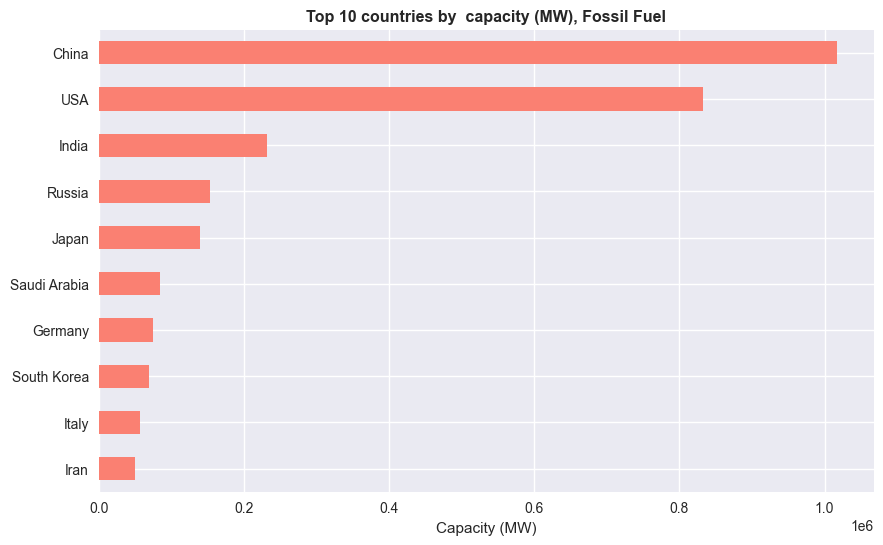

In [37]:
# Select fossil fuels and renewable
fossil_fuels = ['Coal', 'Gas', 'Oil']
renewable = ["Solar", "Wind", "Hydro", "Biomass", "Geothermal"]

# Sum capacity by country for fossil fuels
fossil_capacity = (df[df['primary_fuel'].isin(fossil_fuels)].groupby('country_long')['capacity_mw'].sum().sort_values(ascending=False).head(10))

fossil_capacity = fossil_capacity[::-1]

# Plot
fossil_capacity.plot(kind='barh', color = 'salmon', figsize=(10,6))
plt.title("Top 10 countries by  capacity (MW), Fossil Fuel", fontsize=11.5, fontweight='bold')
plt.xlabel('Capacity (MW)')
plt.ylabel(None)
plt.show()


## **Which countries are leaders in renewable capacity (solar, wind, hydro)?**

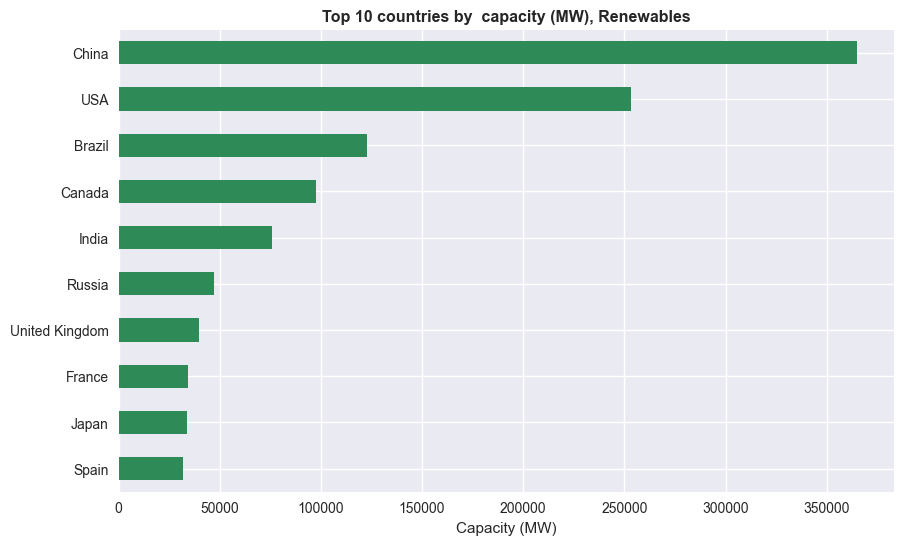

In [38]:
# Total renewable capacity by country
renewable_capacity = df[df["primary_fuel"].isin(renewable)].groupby("country_long")["capacity_mw"].sum().sort_values(ascending=False).head(10)

renewable_capacity = renewable_capacity[::-1]  # Reverse the order for horizontal bar chart
# Plot
renewable_capacity.plot(kind="barh", figsize=(10,6), color="seagreen")
plt.title("Top 10 countries by  capacity (MW), Renewables", fontsize=11.5, fontweight='bold')
plt.xlabel('Capacity (MW)')
plt.ylabel(None)
plt.show()


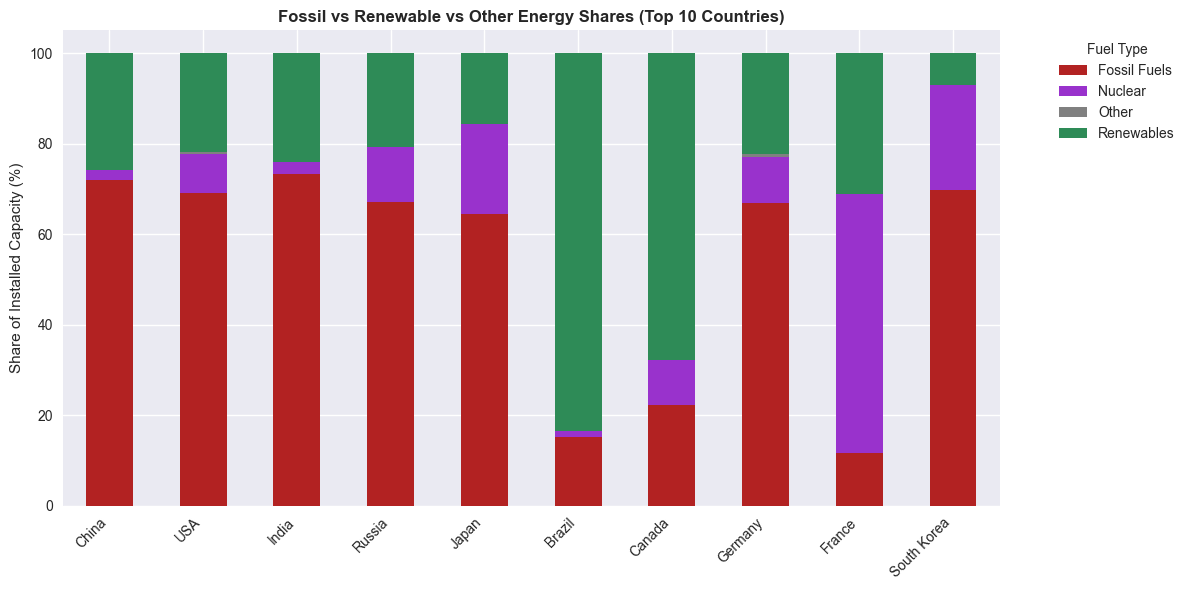

In [39]:
# --- Define categories ---
fossil_fuels = ["Coal", "Gas", "Oil"]
# renewables = ["Solar", "Wind", "Hydro", "Biomass", "Geothermal"]
renewables = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']

nuclear = ["Nuclear"]


# --- Assign each plant to a category ---
def categorize_fuel(fuel):
    if fuel in fossil_fuels:
        return "Fossil Fuels"
    elif fuel in renewables:
        return "Renewables"
    elif fuel in nuclear:
        return "Nuclear"
    else:
        return "Other"

df["fuel_category"] = df["primary_fuel"].apply(categorize_fuel)

# --- Group by country and fuel category ---
country_fuel = df.groupby(["country_long", "fuel_category"])["capacity_mw"].sum().unstack(fill_value=0)

# --- Get top 10 countries by total capacity ---
top_countries = country_fuel.sum(axis=1).sort_values(ascending=False).head(10).index
top_data = country_fuel.loc[top_countries]

# --- Normalize to percentages ---
top_data_pct = top_data.div(top_data.sum(axis=1), axis=0) * 100

# --- Plot stacked bar ---
top_data_pct.plot(kind="bar", stacked=True, figsize=(12,6),
                    color=["firebrick", "darkorchid", "grey","seagreen"])

plt.ylabel("Share of Installed Capacity (%)")
plt.xlabel(None)
plt.title("Fossil vs Renewable vs Other Energy Shares (Top 10 Countries)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [40]:
# ...existing code...

# Define renewable fuels
renewable = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']

# List of countries to compare
countries = ['Brazil', 'United Kingdom', 'USA']

# Prepare a results dictionary
results = {}

for country in countries:
    country_df = df[df['country_long'] == country]
    total_energy = country_df['capacity_mw'].sum()
    renewable_energy = country_df[country_df['primary_fuel'].isin(renewable)]['capacity_mw'].sum()
    pct_renewable = (renewable_energy / total_energy * 100) if total_energy > 0 else 0
    results[country] = pct_renewable

# Display results
for country, pct in results.items():
    print(f"{country}: {pct:.1f}% renewable energy (2017 estimate)")

Brazil: 83.4% renewable energy (2017 estimate)
United Kingdom: 46.1% renewable energy (2017 estimate)
USA: 21.9% renewable energy (2017 estimate)
